In [4]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
import plotly.express as px

In [6]:
df1 = pd.read_csv("natural_disasters_2024.csv")

In [18]:
df1.head(20)

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
6252,6253,Wildfire,China,5.779710,2024-09-17 12:00:00,1800,6.561750e+08
4684,4685,Hurricane,Japan,8.115571,2024-07-14 04:00:00,239,7.489289e+08
1731,1732,Flood,Indonesia,7.679975,2024-03-13 03:00:00,9438,3.617054e+08
4742,4743,Flood,Japan,8.986789,2024-07-16 14:00:00,7176,6.389135e+08
4521,4522,Earthquake,Brazil,8.400407,2024-07-07 09:00:00,6728,4.586667e+08
6340,6341,Wildfire,USA,9.497951,2024-09-21 04:00:00,4584,7.026470e+08
576,577,Wildfire,China,4.610961,2024-01-25 00:00:00,5177,1.931533e+08
5202,5203,Wildfire,China,4.254853,2024-08-04 18:00:00,6270,2.503446e+08
6363,6364,Tornado,USA,9.198122,2024-09-22 03:00:00,2548,7.965213e+08
439,440,Earthquake,USA,9.824916,2024-01-19 07:00:00,8658,8.002571e+08


In [10]:
len(df1)

10000

In [12]:
df1 = df1.sample(n=1000, random_state=42)

# Check the first few rows of the sampled data
df1.head()

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
6252,6253,Wildfire,China,5.779710,2024-09-17 12:00:00,1800,6.561750e+08
4684,4685,Hurricane,Japan,8.115571,2024-07-14 04:00:00,239,7.489289e+08
1731,1732,Flood,Indonesia,7.679975,2024-03-13 03:00:00,9438,3.617054e+08
4742,4743,Flood,Japan,8.986789,2024-07-16 14:00:00,7176,6.389135e+08
4521,4522,Earthquake,Brazil,8.400407,2024-07-07 09:00:00,6728,4.586667e+08


/var/folders/lc/3w96ls3d4352g3700p5lddhh0000gn/T/ipykernel_59308/1450831534.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_count.index, y=disaster_count.values, palette="viridis")


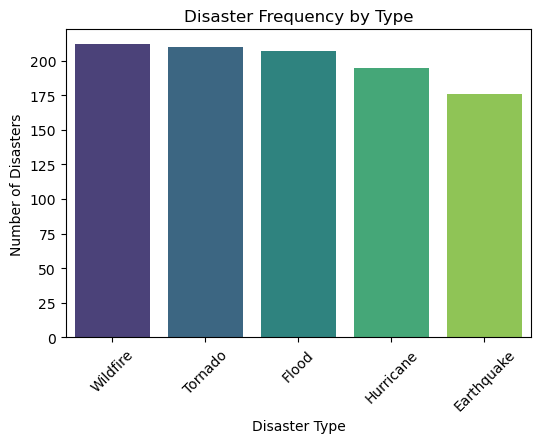

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of disasters per type
disaster_count = df1['Disaster_Type'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=disaster_count.index, y=disaster_count.values, palette="viridis")
plt.title('Disaster Frequency by Type')
plt.xlabel('Disaster Type')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=45)
plt.show()


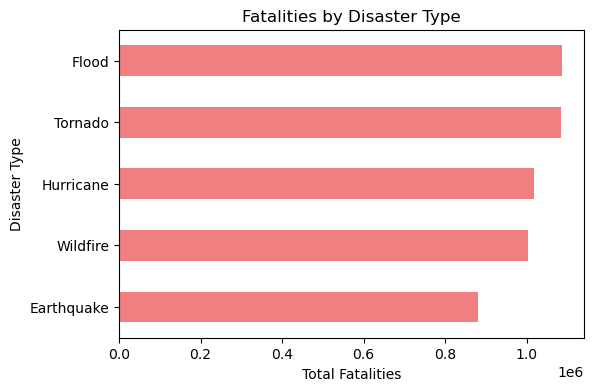

In [28]:
# Sum of fatalities per disaster type
fatalities_by_type = df1.groupby('Disaster_Type')['Fatalities'].sum().sort_values()

# Plot
plt.figure(figsize=(6, 4))
fatalities_by_type.plot(kind='barh', color='lightcoral')
plt.title('Fatalities by Disaster Type')
plt.xlabel('Total Fatalities')
plt.ylabel('Disaster Type')
plt.show()


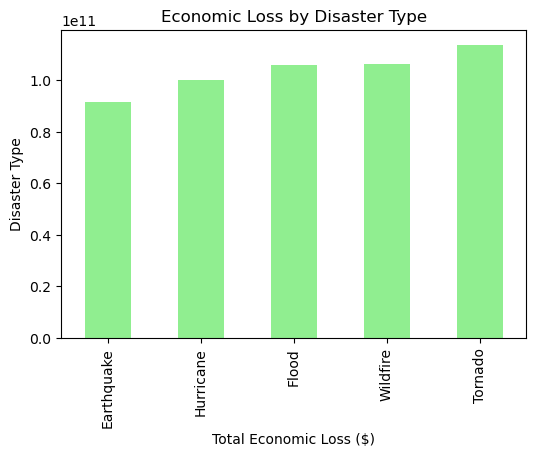

In [32]:
# Sum of economic loss per disaster type
economic_loss_by_type = df1.groupby('Disaster_Type')['Economic_Loss($)'].sum().sort_values()

# Plot
plt.figure(figsize=(6, 4))
economic_loss_by_type.plot(kind='bar', color='lightgreen')
plt.title('Economic Loss by Disaster Type')
plt.xlabel('Total Economic Loss ($)')
plt.ylabel('Disaster Type')
plt.show()


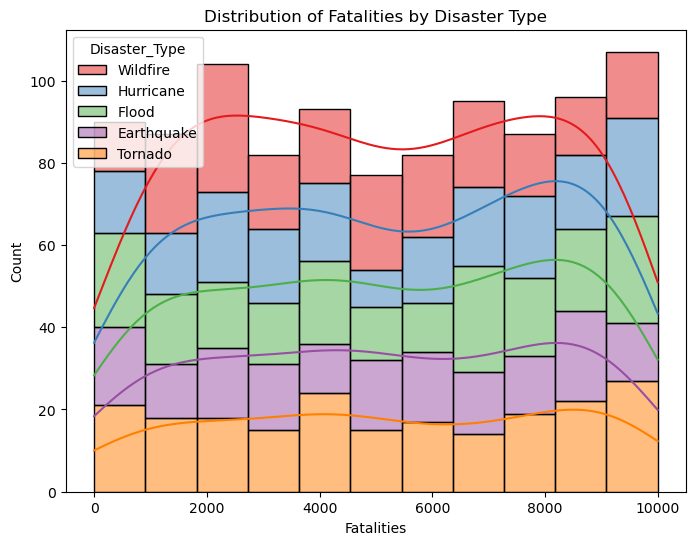

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df1, x='Fatalities', hue='Disaster_Type', multiple='stack', palette='Set1', kde=True)
plt.title('Distribution of Fatalities by Disaster Type')
plt.xlabel('Fatalities')
plt.ylabel('Count')
plt.show()

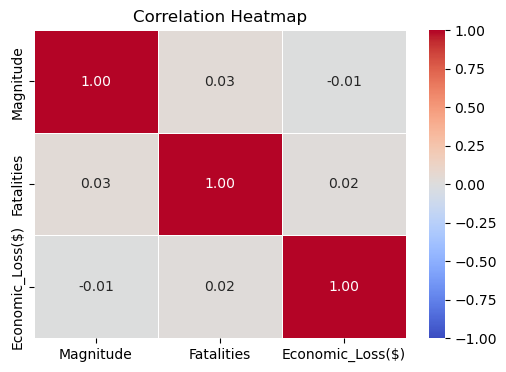

In [48]:
# Select numeric columns
numeric_cols = df1[['Magnitude', 'Fatalities', 'Economic_Loss($)']]

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [86]:
df = pd.read_csv("emergency_events.csv")


In [68]:
df.head(10)

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,#date +occurred,#country +name,#country +code,#cause +group,#cause +subgroup,#cause +type,#cause +subtype,#frequency,#affected +ind,#affected +ind +killed,NaN,#value +usd,NaN
1,1900,Cabo Verde,CPV,Natural,Climatological,Drought,Drought,1,NaN,11000,NaN,NaN,2.849084
2,1900,India,IND,Natural,Climatological,Drought,Drought,1,NaN,1250000,NaN,NaN,2.849084
3,1900,Jamaica,JAM,Natural,Hydrological,Flood,NaN,1,NaN,300,NaN,NaN,2.849084
4,1900,Japan,JPN,Natural,Geophysical,Volcanic activity,Ash fall,1,NaN,30,NaN,NaN,2.849084
5,1900,Turkey,TUR,Natural,Geophysical,Earthquake,Ground movement,1,NaN,140,NaN,NaN,2.849084
6,1900,United States of America (the),USA,Natural,Meteorological,Storm,Tropical cyclone,1,NaN,6000,30000000.0,1052969856,2.849084
7,1901,Japan,JPN,Natural,Geophysical,Earthquake,Tsunami,1,24,18,NaN,NaN,2.849084
8,1902,China,CHN,Natural,Geophysical,Earthquake,Ground movement,1,NaN,2500,NaN,NaN,2.963048
9,1902,Guatemala,GTM,Natural,Geophysical,Earthquake,Ground movement,1,NaN,2000,25000000.0,843725846,2.963048


In [88]:
import pandas as pd


# Remove row 0 if it is a header
df = df[1:].reset_index(drop=True)

df.head()


,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,1900,Cabo Verde,CPV,Natural,Climatological,Drought,Drought,1,NaN,11000,NaN,NaN,2.849084
1,1900,India,IND,Natural,Climatological,Drought,Drought,1,NaN,1250000,NaN,NaN,2.849084
2,1900,Jamaica,JAM,Natural,Hydrological,Flood,NaN,1,NaN,300,NaN,NaN,2.849084
3,1900,Japan,JPN,Natural,Geophysical,Volcanic activity,Ash fall,1,NaN,30,NaN,NaN,2.849084
4,1900,Turkey,TUR,Natural,Geophysical,Earthquake,Ground movement,1,NaN,140,NaN,NaN,2.849084


In [90]:
# Step 1: Replace common non-numeric entries like 'NaN' (string) or any text with actual NaN
df['Total Deaths'] = df['Total Deaths'].replace(['NaN', 'nan', 'None', 'none', ''], pd.NA)

# Step 2: Convert to numeric, forcing any errors to NaN
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce')

# Verify the conversion
print(df['Total Deaths'].dtype)  # Should now be float64 or int
print(df['Total Deaths'].isnull().sum())  # Check how many NaN values after conversion


float64
3056


In [94]:
# Step 2: Handle missing values
# Fill missing numerical data with 0 (or you could use the mean or median)
df['Total Affected'] = df['Total Affected'].fillna(0)
df['Total Damage (USD, original)'] = df['Total Damage (USD, original)'].fillna(0)
df['Total Damage (USD, adjusted)'] = df['Total Damage (USD, adjusted)'].fillna(0)

# Fill missing categorical data with 'Unknown' or a placeholder
df['Disaster Subtype'] = df['Disaster Subtype'].fillna('Unknown')

# Check for missing values

median_deaths = df['Total Deaths'].median()

df['Total Deaths'] = df['Total Deaths'].fillna(median_deaths)  # or median_deaths

mean_cpi = df['CPI'].mean()
df['CPI'] = df['CPI'].fillna(mean_cpi)
print(df.isnull().sum())



Year                            0
Country                         0
ISO                             0
Disaster Group                  0
Disaster Subroup                0
Disaster Type                   0
Disaster Subtype                0
Total Events                    0
Total Affected                  0
Total Deaths                    0
Total Damage (USD, original)    0
Total Damage (USD, adjusted)    0
CPI                             0
dtype: int64


In [96]:
# Step 4: Remove duplicates
df = df.drop_duplicates()

# Check if any duplicates remain
print(f"Remaining duplicates: {df.duplicated().sum()}")


Remaining duplicates: 0


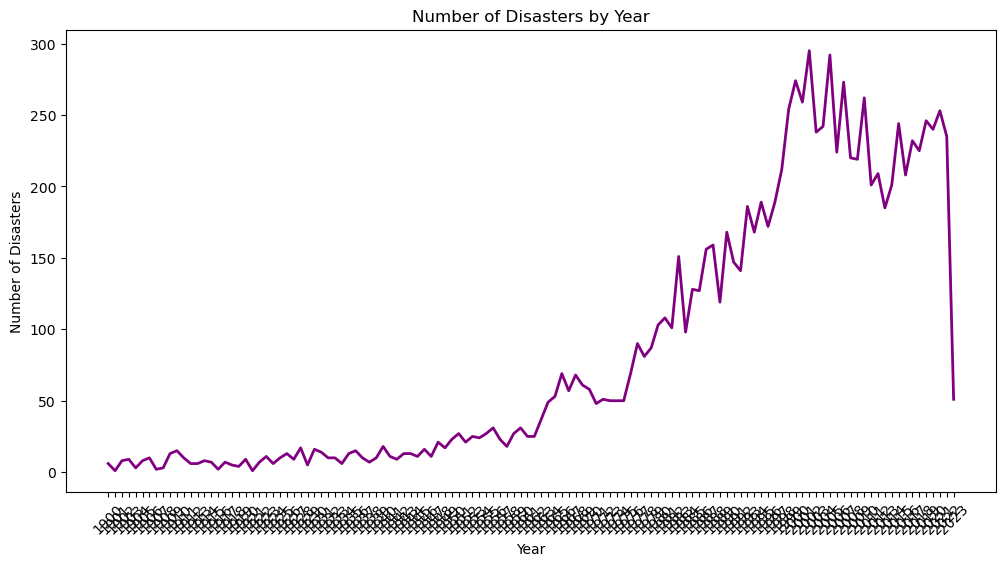

In [102]:
# Group by 'Year' and count the number of disasters
disasters_by_year = df.groupby('Year').size()

# Plot the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=disasters_by_year.index, y=disasters_by_year.values, color='purple', lw=2)
plt.title('Number of Disasters by Year')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=45)
plt.show()


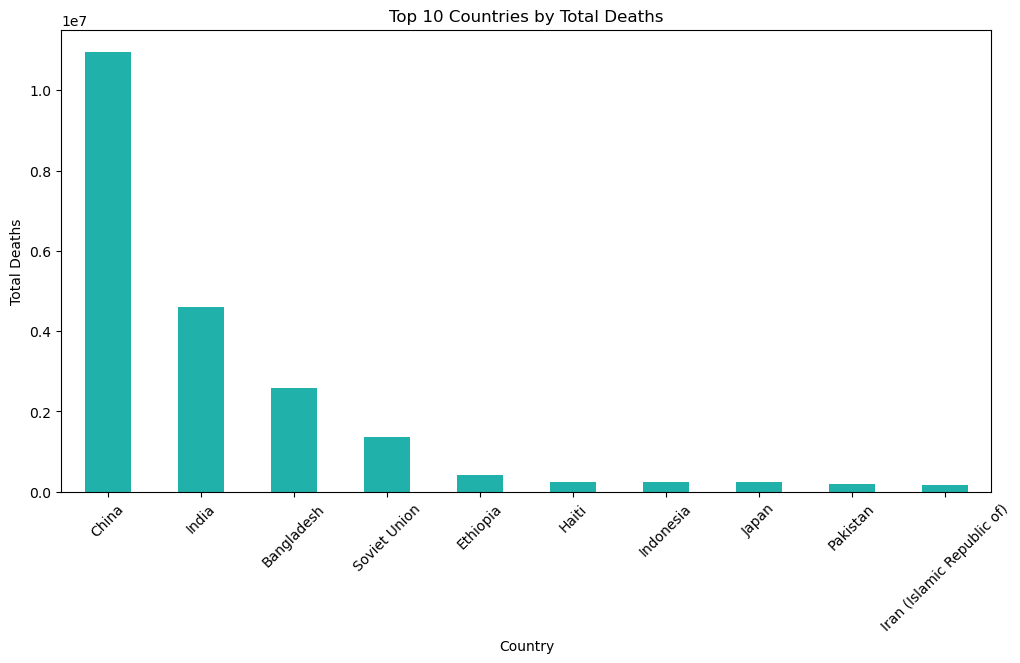

In [104]:
# Group by 'Country' and sum the total deaths
deaths_by_country = df.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False)

# Select the top 10 countries
top_10_deaths = deaths_by_country.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_10_deaths.plot(kind='bar', color='lightseagreen')
plt.title('Top 10 Countries by Total Deaths')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.show()


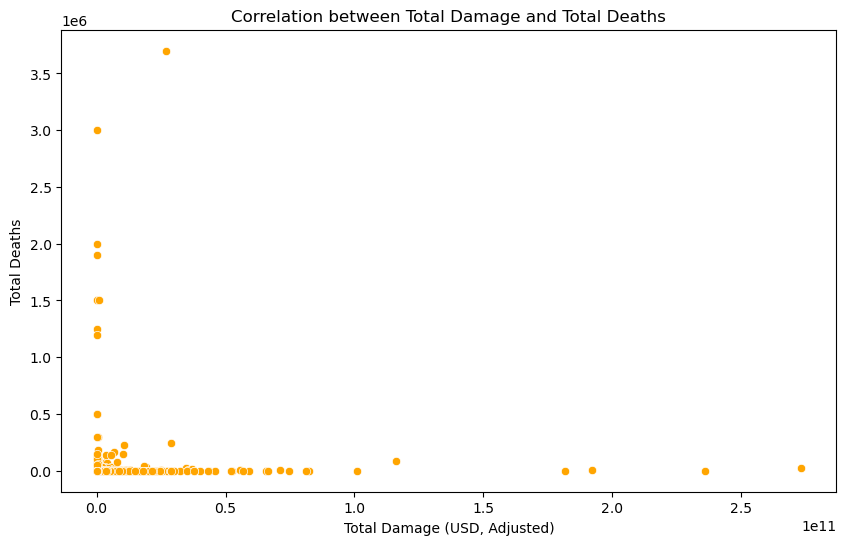

In [106]:
# Scatter plot between Total Deaths and Total Damage (adjusted)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Damage (USD, adjusted)', y='Total Deaths', data=df, color='orange')
plt.title('Correlation between Total Damage and Total Deaths')
plt.xlabel('Total Damage (USD, Adjusted)')
plt.ylabel('Total Deaths')
plt.show()


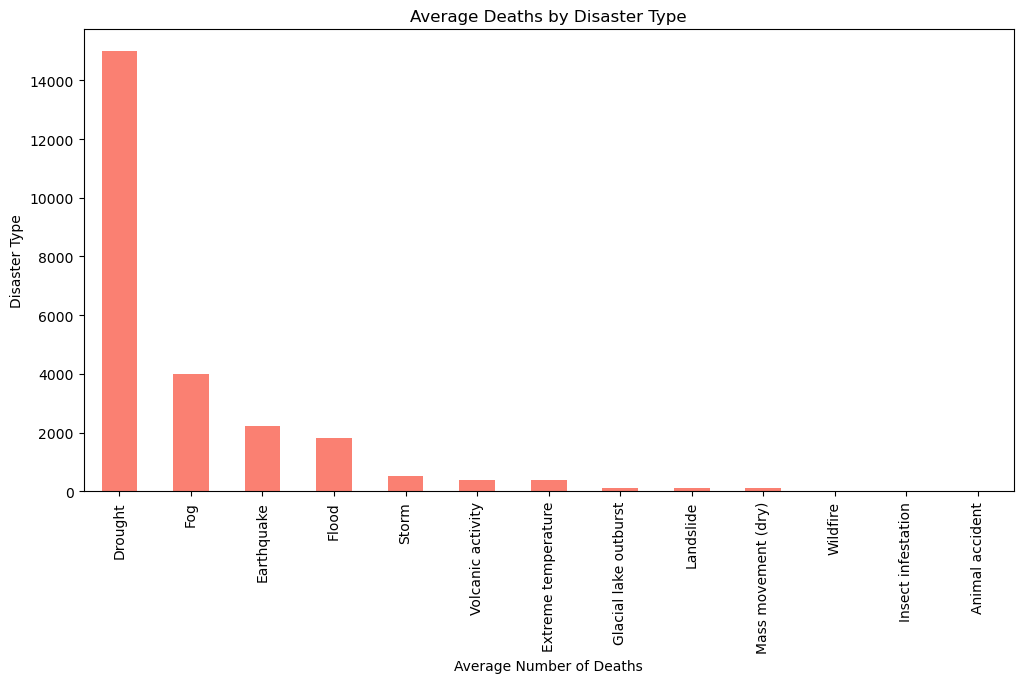

In [110]:
# Calculate the average number of deaths per disaster type
avg_deaths_by_type = df.groupby('Disaster Type')['Total Deaths'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
avg_deaths_by_type.plot(kind='bar', color='salmon')
plt.title('Average Deaths by Disaster Type')
plt.xlabel('Average Number of Deaths')
plt.ylabel('Disaster Type')
plt.show()
